In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from IPython.display import SVG
from IPython.display import display
from subprocess import call
import pydotplus
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt

In [3]:
# read data
Data2 = pd.read_csv('/Users/pranavraj/Desktop/Univ of Cin/IDA/Data/Data2.csv')

In [4]:
#rename the target variables to values in integer for better classification
Data2.head()
Data2['class']=Data2['class'].map({'Abnormal':0,'Normal':1})

In [5]:
#split data into X and y, where X contains all the features and y has only the target variable
X = Data2.iloc[:,0:6]
y = Data2.iloc[:,6]

In [6]:
#Show summary statistics of the dataset
Data2.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.322581
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,1.000000


In [7]:
#Split the Dataset such that 210 records are assigned to the training data and 100 records to test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3226, random_state = 100)

In [8]:
#Create 5 decision trees, each with a different value for the minimum samples required to be in the leaf node. 
#clf = DecisionTreeClassifier(min_samples_leaf=3)
#clf1 = DecisionTreeClassifier(min_samples_leaf=8)
clf2 = DecisionTreeClassifier(min_samples_leaf=12)
#clf3 = DecisionTreeClassifier(min_samples_leaf=30)
#clf4 = DecisionTreeClassifier(min_samples_leaf=50)

In [9]:
#Train each individual classifier on the training data
#clf = clf.fit(X_train,y_train)
#clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
#clf3 = clf3.fit(X_train,y_train)
#clf4 = clf4.fit(X_train,y_train)

In [10]:
#Get the predicted target variable for each individual classifier which has been created. 
#pred = clf.predict(X_test)
#pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)
#pred3 = clf3.predict(X_test)
#pred4 = clf4.predict(X_test)

In [11]:
#find the various performance metrics - accuracy, precision, recall, f1-score, support of the classifier
from sklearn.metrics import classification_report, accuracy_score
c_re1 = classification_report(y_test,pred2)
print(c_re1)
accuracy = accuracy_score(y_test,pred2)
print("Accuracy is %f" % (accuracy))

             precision    recall  f1-score   support

          0       0.81      0.88      0.84        65
          1       0.74      0.64      0.69        36

avg / total       0.79      0.79      0.79       101

Accuracy is 0.792079


In [43]:
#Generate the confusion matrix for Actual vs Predicted ()
confusionMatrix = confusion_matrix(y_test, pred2)
print("Confusion Matrix: \n", confusionMatrix)

Confusion Matrix: 
 [[57  8]
 [13 23]]


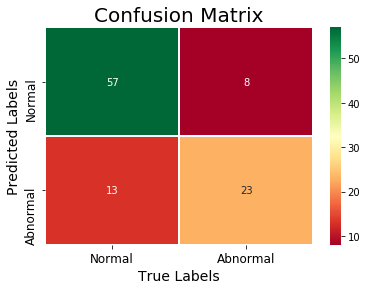

In [44]:
#Visualise the confusion matrix using seaborn's heatmap
ax = sns.heatmap(confusionMatrix, annot=True, linewidths=.5, xticklabels=True, yticklabels=True,cmap='RdYlGn');
ax.xaxis.set_ticklabels(['Normal', 'Abnormal'], fontsize=12); ax.yaxis.set_ticklabels(['Normal', 'Abnormal'], fontsize=12);
ax.set_title('Confusion Matrix', fontsize=20);
ax.set_ylabel('Predicted Labels', fontsize=14);
ax.set_xlabel('True Labels', fontsize=14); 

In [12]:
#Partition each of the feature columns into four sets of equal width of values
Data2['pelvic_incidence'],bins = pd.qcut(Data2['pelvic_incidence'],q=4,labels=False,retbins=True)
Data2['sacral_slope'],bins3 = pd.qcut(Data2['sacral_slope'],q=4,labels=False,retbins=True)
Data2['pelvic_radius'],bins4 = pd.qcut(Data2['pelvic_radius'],q=4,labels=False,retbins=True)
Data2['degree_spondylolisthesis'],bins5 = pd.qcut(Data2['degree_spondylolisthesis'],q=4,labels=False,retbins=True)
Data2['lumbar_lordosis_angle'],bins2 = pd.qcut(Data2['lumbar_lordosis_angle'],q=4,labels=False,retbins=True)
Data2['pelvic_tilt numeric'],bins1 = pd.qcut(Data2['pelvic_tilt numeric'],q=4,labels=False,retbins=True)

In [13]:
#see dataset after feature columns have been partitioned
Data2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,2,3,1,1,0,0,0
1,0,0,0,0,1,1,0
2,2,3,2,2,0,0,0
3,2,3,1,2,0,1,0
4,1,0,0,1,0,1,0


In [14]:
#split data into X and y, where X contains all the features and y has only the target variable
X = Data2.iloc[:,0:6]
y = Data2.iloc[:,6]

In [15]:
#Split the Dataset such that 210 records are assigned to the training data and 100 records to test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3226, random_state = 100)

In [16]:
#Create 5 decision trees, each with a different value for the minimum samples required to be in the leaf node. 
#clf = DecisionTreeClassifier(min_samples_leaf=3)
clf1 = DecisionTreeClassifier(min_samples_leaf=8)
#clf2 = DecisionTreeClassifier(min_samples_leaf=12)
#clf3 = DecisionTreeClassifier(min_samples_leaf=30)
#clf4 = DecisionTreeClassifier(min_samples_leaf=50)

In [17]:
#Train each individual classifier on the training data
#clf = clf.fit(X_train,y_train)
clf1 = clf1.fit(X_train,y_train)
#clf2 = clf2.fit(X_train,y_train)
#clf3 = clf3.fit(X_train,y_train)
#clf4 = clf4.fit(X_train,y_train)

In [18]:
#Get the predicted target variable for each individual classifier which has been created. 
#pr = clf.predict(X_test)
pr1 = clf1.predict(X_test)
#pr2 = clf2.predict(X_test)
#pr3 = clf3.predict(X_test)
#pr4 = clf4.predict(X_test)

In [19]:
#find the various performance metrics - accuracy, precision, recall, f1-score, support of the classifier (after binning of data)
c_re1 = classification_report(y_test,pr1)
print(c_re1)
accuracy = accuracy_score(y_test,pr1)
print("Accuracy is %f" % (accuracy))

             precision    recall  f1-score   support

          0       0.78      0.94      0.85        65
          1       0.83      0.53      0.64        36

avg / total       0.80      0.79      0.78       101

Accuracy is 0.792079


In [24]:
#Generate the confusion matrix for Actual vs Predicted ()
confusionMatrix = confusion_matrix(y_test, pr1)
print("Confusion Matrix: \n", confusionMatrix)

Confusion Matrix: 
 [[61  4]
 [17 19]]


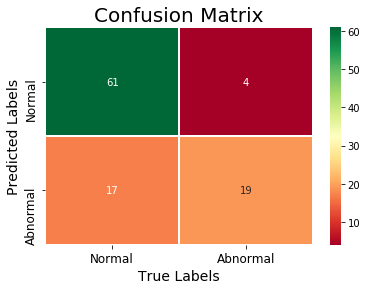

In [42]:
#Visualise the confusion matrix using seaborn's heatmap
ax = sns.heatmap(confusionMatrix, annot=True, linewidths=.5, xticklabels=True, yticklabels=True,cmap='RdYlGn');
ax.xaxis.set_ticklabels(['Normal', 'Abnormal'], fontsize=12); ax.yaxis.set_ticklabels(['Normal', 'Abnormal'], fontsize=12);
ax.set_title('Confusion Matrix', fontsize=20);
ax.set_ylabel('Predicted Labels', fontsize=14);
ax.set_xlabel('True Labels', fontsize=14); 